# Reliance stock VWAP prediction

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
import matplotlib.dates as mdates
import scipy.stats
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pylab
sns.set(style='white')
from pmdarima import auto_arima
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose


## Import dataset

In [2]:
df=pd.read_csv('RELIANCE.csv')

### Converting Date into DateTime format 

In [3]:
df['Date']=pd.to_datetime(df['Date'])
df.set_index(['Date'],inplace=True)

In [4]:
df.head()

Symbol Series  Prev Close    Open    High     Low    Last  \
Date                                                                      
2000-01-03  RELIANCE     EQ      233.05  237.50  251.70  237.50  251.70   
2000-01-04  RELIANCE     EQ      251.70  258.40  271.85  251.30  271.85   
2000-01-05  RELIANCE     EQ      271.85  256.65  287.90  256.65  286.75   
2000-01-06  RELIANCE     EQ      282.50  289.00  300.70  289.00  293.50   
2000-01-07  RELIANCE     EQ      294.35  295.00  317.90  293.00  314.50   

             Close    VWAP    Volume      Turnover  Trades  \
Date                                                         
2000-01-03  251.70  249.37   4456424  1.111319e+14     NaN   
2000-01-04  271.85  263.52   9487878  2.500222e+14     NaN   
2000-01-05  282.50  274.79  26833684  7.373697e+14     NaN   
2000-01-06  294.35  295.45  15682286  4.633254e+14     NaN   
2000-01-07  314.55  308.91  19870977  6.138388e+14     NaN   

            Deliverable Volume  %Deliverble  
Date                                         
2000-01-03                 NaN          NaN  
2000-01-04                 NaN          NaN  
2000-01-05                 NaN          NaN  
2000-01-06                 NaN          NaN  
2000-01-07                 NaN          NaN

## Data summary

In [5]:
df.describe()

Prev Close         Open         High          Low         Last  \
count  5141.000000  5141.000000  5141.000000  5141.000000  5141.000000   
mean    977.737065   979.234332   993.166077   963.957294   977.921659   
std     548.187888   549.657568   559.194988   537.759371   548.159898   
min     203.200000   205.500000   219.500000   197.150000   203.300000   
25%     556.050000   559.100000   568.600000   550.000000   557.550000   
50%     923.750000   925.700000   936.650000   915.100000   923.900000   
75%    1171.750000  1176.550000  1198.250000  1152.300000  1175.400000   
max    3220.850000  3298.000000  3298.000000  3141.300000  3223.000000   

             Close         VWAP        Volume      Turnover        Trades  \
count  5141.000000  5141.000000  5.141000e+03  5.141000e+03  2.291000e+03   
mean    978.096460   978.644639  5.336247e+06  5.398477e+14  1.310276e+05   
std     548.305224   548.351897  4.674347e+06  7.033455e+14  1.131774e+05   
min     203.200000   212.290000  5.282000e+04  4.295543e+12  2.991000e+03   
25%     556.250000   557.510000  2.801842e+06  2.160521e+14  7.061900e+04   
50%     924.100000   925.730000  4.129033e+06  3.557919e+14  9.688100e+04   
75%    1174.050000  1174.130000  6.335308e+06  6.248018e+14  1.491880e+05   
max    3220.850000  3197.750000  6.523089e+07  1.236080e+16  1.285533e+06   

       Deliverable Volume  %Deliverble  
count        4.627000e+03  4627.000000  
mean         2.206850e+06     0.438410  
std          1.827142e+06     0.145129  
min          2.909700e+04     0.076300  
25%          1.168824e+06     0.327050  
50%          1.765227e+06     0.455100  
75%          2.640922e+06     0.547300  
max          3.495888e+07     0.978300

In [6]:
df.shape

(5141, 14)

### Check for missing values

In [7]:
df.isna().sum()

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     514
%Deliverble            514
dtype: int64

* There are missing vales in Trades , Deliverable Volumne and % deliverable

## Handling missing values 

<AxesSubplot:xlabel='Date'>

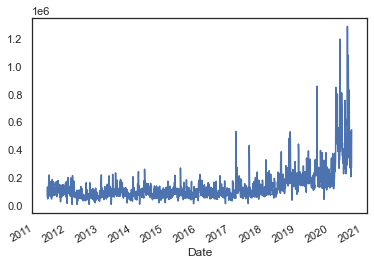

In [8]:
df.Trades.plot()

In [9]:
df.Trades[:2850]

Date
2000-01-03   NaN
2000-01-04   NaN
2000-01-05   NaN
2000-01-06   NaN
2000-01-07   NaN
              ..
2011-05-25   NaN
2011-05-26   NaN
2011-05-27   NaN
2011-05-30   NaN
2011-05-31   NaN
Name: Trades, Length: 2850, dtype: float64

* we don't have data of Trades on and before 31-05-2011 

In [10]:
# removing missing columns

df.drop(['Trades','Deliverable Volume','%Deliverble'],axis=1,inplace=True)


In [11]:
df.VWAP = df.VWAP.fillna(method = "ffill")

# Visualizations

## Plotting VWAP(Volume Weighted Average Price) over time

In [12]:
fig = go.Figure([go.Scatter(x=df.index, y=df['VWAP'])])
fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    title='VWAP over time',
    template="simple_white",
)
fig.update_xaxes(title="Date")
fig.update_yaxes(title="VWAP")
fig.show()

* There is steady increase in prices upto year 2008 
* Stock price fell after jan 2008  and attain pick again in may-june 2009  after that it fell again .

## VWAP in 2019

In [13]:
fig = go.Figure([go.Scatter(x=df.loc['2019', 'VWAP'].index,y=df.loc['2020', 'VWAP'])])
fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    title='VWAP in 2019',
    template="simple_white",
)
fig.update_xaxes(title="Date")
fig.update_yaxes(title="VWAP")

fig.show()

* There was many dips in year 2019 like in May-June , Aug-Sept and in end of the Sept month 

## VWAP in 2020

In [14]:
fig = go.Figure([go.Scatter(x=df.loc['2020', 'VWAP'].index,y=df.loc['2020', 'VWAP'])])
fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    title='VWAP in 2020',
    template="simple_white",
)
fig.update_xaxes(title="Date")
fig.update_yaxes(title="VWAP")
fig.show()

* as you can see there is deep in the month of march and april.
* Steady increase after month of april .

## Open,close,High,low prices over time 

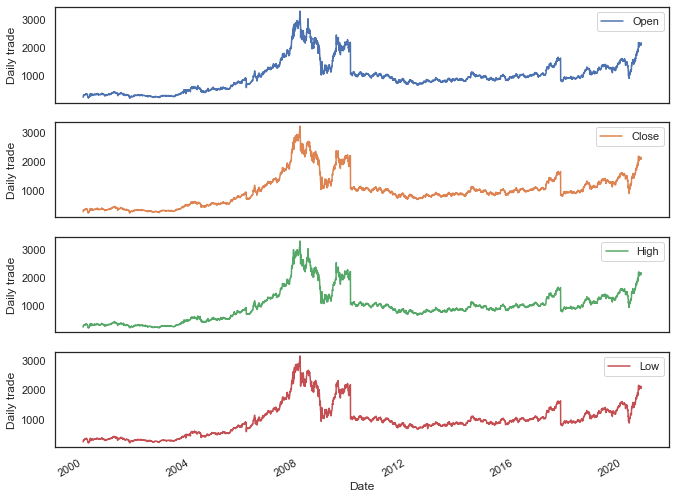

In [15]:
cols_plot = ['Open', 'Close', 'High','Low']
axes = df[cols_plot].plot(figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

* All are following same pattern 

## Volume over Time 

In [16]:
fig = go.Figure([go.Scatter(x=df.index, y=df['Volume'])])
fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    template='simple_white',
    title='Volume over time'
)
fig.update_xaxes(title="Date")
fig.update_yaxes(title="Volume")
fig.show()

## Volume in 2020

In [17]:
fig = go.Figure([go.Scatter(x=df.loc['2020', 'Volume'].index,y=df.loc['2020', 'Volume'])])
fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    template='simple_white',
    title='Volume in 2020'
)
fig.update_xaxes(title="Date")
fig.update_yaxes(title="Volume")
fig.show()

## Q-Q plot of VWAP 

used to determine whether dataset is distributed a certain way 

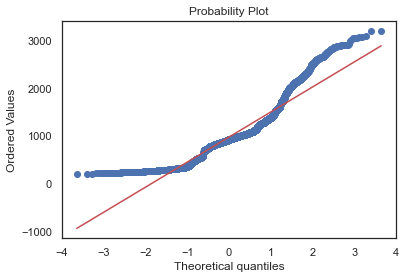

In [18]:
scipy.stats.probplot(df.VWAP,plot=pylab)
pylab.show()

* data is not normally distributed , however this is what we usually expect from timeseries 

## Stationarity 

In the most intuitive sense, stationarity means that the statistical properties of a process generating a time series do not change over time. It does not mean that the series does not change over time, just that the way it changes does not itself change over time. The algebraic equivalent is thus a linear function, perhaps, and not a constant one; the value of a linear function changes as 𝒙 grows, but the way it changes remains constant — it has a constant slope; one value that captures that rate of change.

## Check Stationarity i.e Dicky Fuller Test

The Augmented Dickey-Fuller test is a type of statistical test called a unit root test.

The intuition behind a unit root test is that it determines how strongly a time series is defined by a trend
It uses an autoregressive model and optimizes an information criterion across multiple different lag values.

The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.

**Null Hypothesis (H0)**: If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.

**Alternate Hypothesis (H1)**: The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

We interpret this result using the p-value from the test. A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (non-stationary).

p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [19]:
def dicky_fuller_test(x):
    result = adfuller(x)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    if result[1]>0.05:
        print("Fail to reject the null hypothesis (H0), the data is non-stationary")
    else:
        print("Reject the null hypothesis (H0), the data is stationary.")

In [20]:
dicky_fuller_test(df['VWAP'])

ADF Statistic: -1.733313
p-value: 0.414036
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Fail to reject the null hypothesis (H0), the data is non-stationary


## Seasonal Decompose

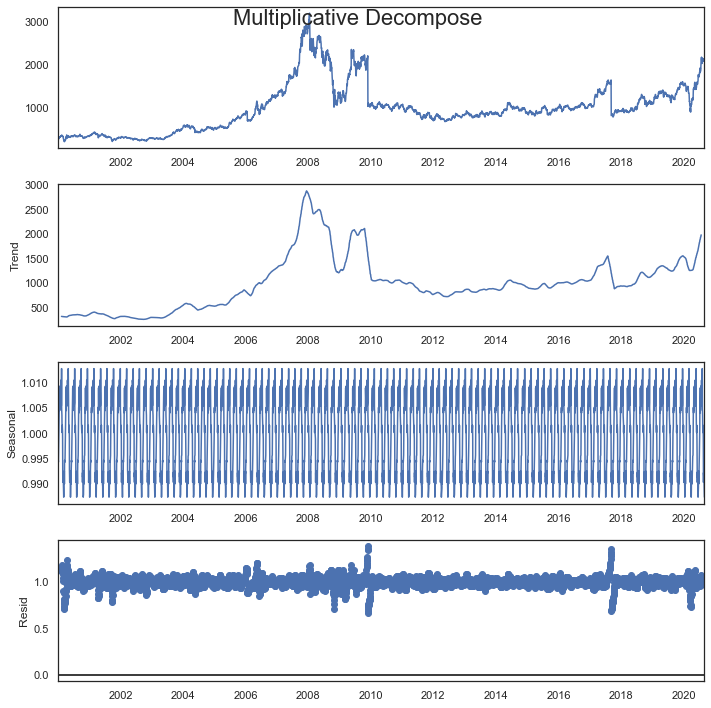

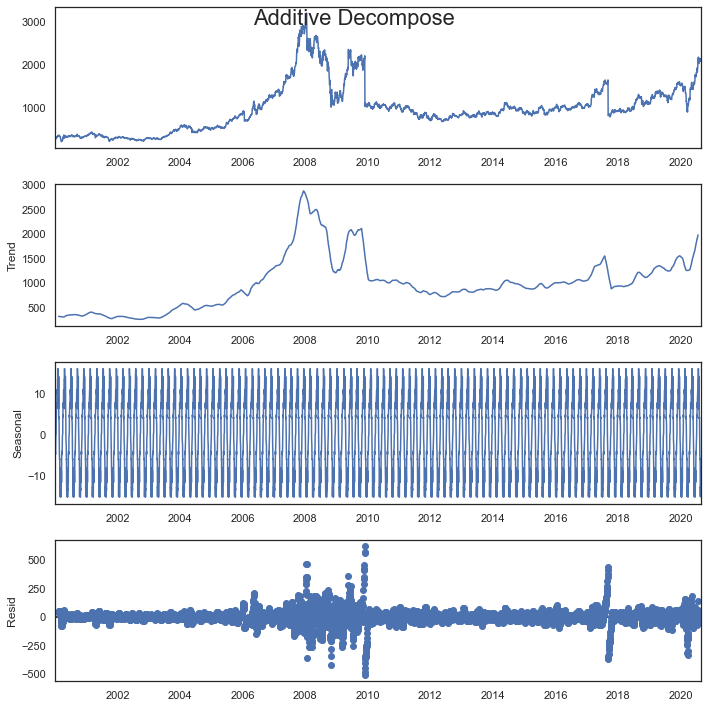

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

plt.rcParams.update({'figure.figsize': (10,10)})
y = df['VWAP'].to_frame()


# Multiplicative Decomposition 
result_mul = seasonal_decompose(y, model='multiplicative',period = 52)

# Additive Decomposition
result_add = seasonal_decompose(y, model='additive',period = 52)

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

* cyclic patter is shown in every 30 days (monthly)

## Convert Stationary into Non Stationary

### Differencing

In [22]:
df['vwap_diff']=df['VWAP']-df['VWAP'].shift(1)

In [23]:
fig = go.Figure([go.Scatter(x=df.index,y=df.VWAP)])
fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    template='simple_white',
    title='VWAP over time ')
fig.show()

In [24]:
fig = go.Figure([go.Scatter(x=df.index,y=df.vwap_diff)])
fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    template='simple_white',
    title='difference VWAP over time ')
fig.show()

* We don't actually need to convert the time series data into stationary data. For study purpose,I have explained how to check stationarity and how to convert non-stationary data into stationary data 

## Plotting ACF and PACF 

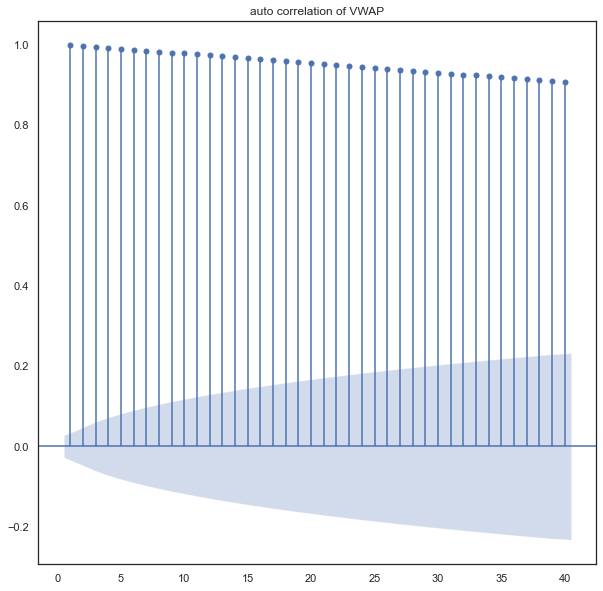

In [25]:
sm.graphics.tsa.plot_acf(df['VWAP'].iloc[1:], lags=40,title='auto correlation of VWAP',zero=False)
plt.show()

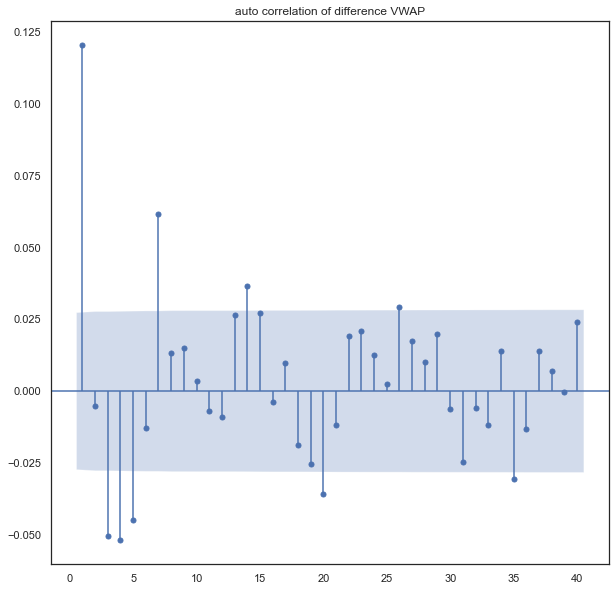

In [26]:
sm.graphics.tsa.plot_acf(df['vwap_diff'].iloc[7:], lags=40,title='auto correlation of difference VWAP',zero=False)
plt.show()

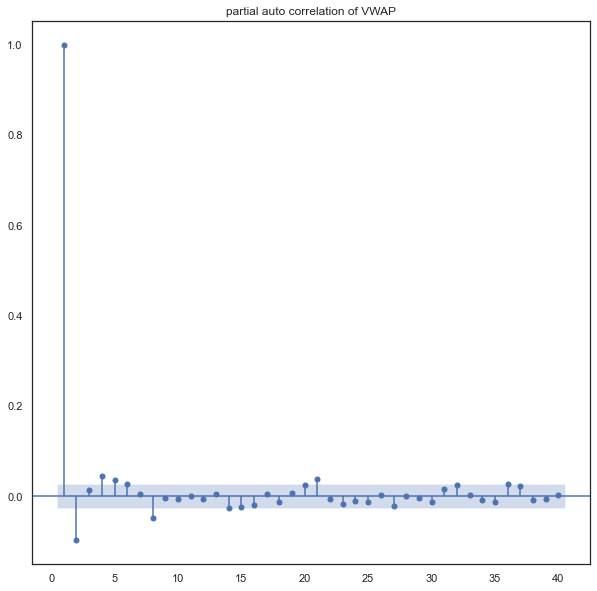

In [27]:
sm.graphics.tsa.plot_pacf(df['VWAP'].iloc[1:], lags=40,title='partial auto correlation of VWAP',zero=False)
plt.show()

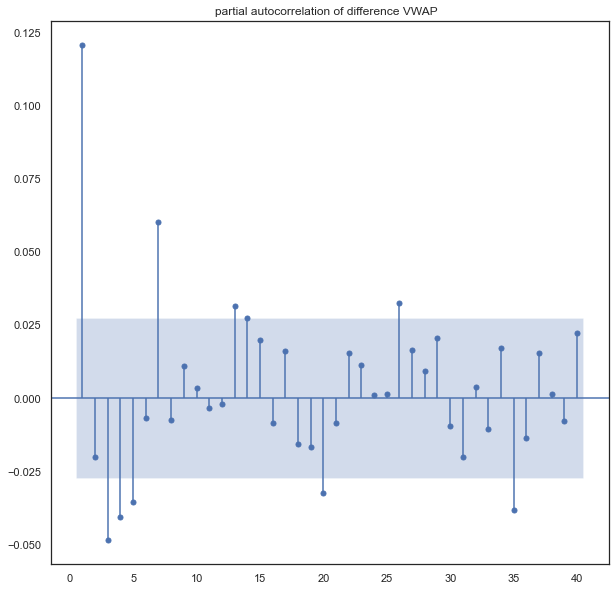

In [28]:
sm.graphics.tsa.plot_pacf(df['vwap_diff'].iloc[1:], lags=40,title='partial autocorrelation of difference VWAP  ',zero=False)
plt.show()

In [29]:
df.shape

(5141, 12)

In [30]:
df=df[['VWAP','Volume', 'Open', 'Close']]
df

VWAP    Volume     Open    Close
Date                                           
2000-01-03   249.37   4456424   237.50   251.70
2000-01-04   263.52   9487878   258.40   271.85
2000-01-05   274.79  26833684   256.65   282.50
2000-01-06   295.45  15682286   289.00   294.35
2000-01-07   308.91  19870977   295.00   314.55
...             ...       ...      ...      ...
2020-08-25  2089.41   8947709  2106.00  2082.10
2020-08-26  2102.41  27631028  2085.00  2137.30
2020-08-27  2126.98  12962139  2148.00  2110.60
2020-08-28  2118.85  12537684  2120.00  2116.15
2020-08-31  2118.64  28649141  2174.00  2080.70

[5141 rows x 4 columns]

### Splitting dataset

In [31]:
df_train=df[:4626]
df_test=df[4626:]

# ARIMA

In [32]:
from statsmodels.tsa.arima_model import ARIMA
#arima=ARIMA(df, order=(1,1,1)).fit()

In [33]:
# fitting model
model = ARIMA(df_train['VWAP'], order=(1, 1, 1))
model_fit = model.fit()
# make prediction
arima = model_fit.predict(4626, 5140, typ='levels')
arima.index = df_test.index
arima

C:\Users\vinay\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


C:\Users\vinay\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. foreca

Date
2018-07-27    1113.789246
2018-07-30    1113.972097
2018-07-31    1114.159221
2018-08-01    1114.346407
2018-08-02    1114.533594
                 ...     
2020-08-25    1209.250205
2020-08-26    1209.437391
2020-08-27    1209.624578
2020-08-28    1209.811765
2020-08-31    1209.998952
Length: 515, dtype: float64

In [34]:
temp_df=pd.concat([arima,df_test['VWAP']],axis=1)
temp_df.columns=['forecast_VWAP', 'actual_VWAP']
temp_df

forecast_VWAP  actual_VWAP
Date                                  
2018-07-27    1113.789246      1127.43
2018-07-30    1113.972097      1143.36
2018-07-31    1114.159221      1171.82
2018-08-01    1114.346407      1193.58
2018-08-02    1114.533594      1174.13
...                   ...          ...
2020-08-25    1209.250205      2089.41
2020-08-26    1209.437391      2102.41
2020-08-27    1209.624578      2126.98
2020-08-28    1209.811765      2118.85
2020-08-31    1209.998952      2118.64

[515 rows x 2 columns]

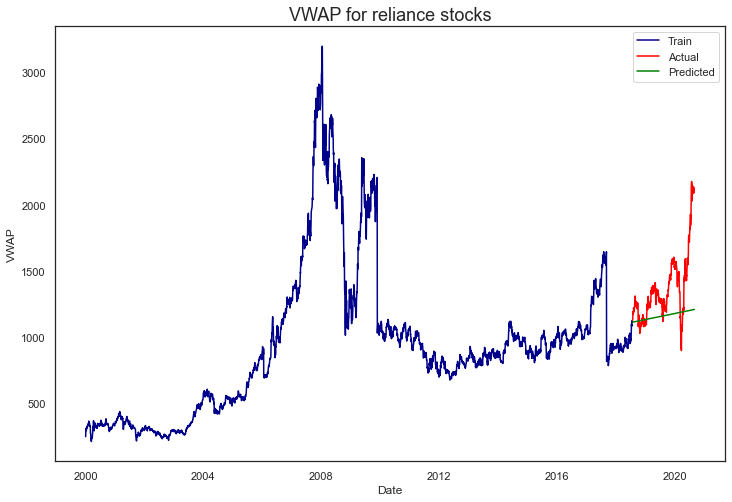

In [35]:
# plotting
plt.figure(figsize=(12,8))
plt.plot(df_train['VWAP'], label ='Train',color='darkblue')
plt.plot(df_test['VWAP'], label ='Actual',color='red')
plt.plot(arima, label ='Predicted',color='green')
plt.title('VWAP for reliance stocks', fontsize = 18)
plt.xlabel("Date")
plt.ylabel("VWAP")
plt.legend()
plt.show()

Text(0, 0.5, 'VWAP')

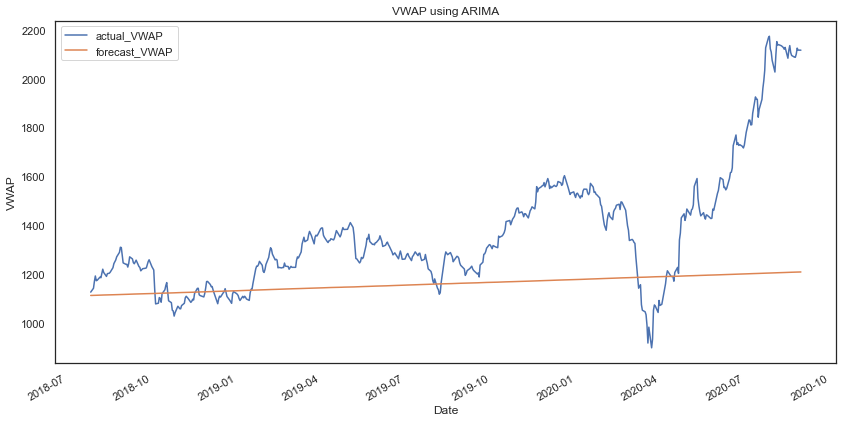

In [36]:
temp_df[["actual_VWAP", "forecast_VWAP"]].plot(figsize=(14, 7))
plt.title('VWAP using ARIMA')
plt.ylabel('VWAP')

### Results

In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
rmse = np.sqrt(mean_squared_error(temp_df['forecast_VWAP'],temp_df['actual_VWAP']))
print('RMSE: %.2f'% (rmse))
mape =  mean_absolute_percentage_error(temp_df['forecast_VWAP'],temp_df['actual_VWAP'])
print('MAPE: %.2f'% (mape), "%")

RMSE: 315.63
MAPE: 0.19 %


# SARIMA

In [38]:
ex_fet = ['Volume', 'Open']

In [39]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# fit model for SBI
model = SARIMAX(df_train['VWAP'], order=(1, 1, 1), seasonal_order=(1,1,1,30),exog = df_train[ex_fet])
model_fit = model.fit(disp=False)

# make prediction

sarima= model_fit.predict(4626, 5140, exog = df_test[ex_fet])
print(sarima)

C:\Users\vinay\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\vinay\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\vinay\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



4626    1117.785038
4627    1126.807962
4628    1134.945824
4629    1164.973372
4630    1167.558009
           ...     
5136    2043.896757
5137    2032.166441
5138    2065.758588
5139    2057.573234
5140    2088.457043
Name: predicted_mean, Length: 515, dtype: float64


C:\Users\vinay\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [40]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                               VWAP   No. Observations:                 4626
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 30)   Log Likelihood              -21175.462
Date:                            Mon, 11 Jul 2022   AIC                          42364.923
Time:                                    12:25:52   BIC                          42409.952
Sample:                                         0   HQIC                         42380.773
                                           - 4626                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Volume     -1.332e-07    1.2e-07     -1.110      0.267   -3.68e-07    1.02e-07
Open           0.5892      0.001    410.851      0.000       0.586       0.592
ar.L1          0.1128      0.040      2.808      0.005       0.034       0.191
ma.L1         -0.4107      0.039    -10.515      0.000      -0.487      -0.334
ar.S.L30      -0.1303      0.013    -10.173      0.000      -0.155      -0.105
ma.S.L30      -0.6286      0.012    -50.582      0.000      -0.653      -0.604
sigma2       886.6734   4.97e-05   1.78e+07      0.000     886.673     886.673
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):           1092282.76
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               3.02   Skew:                            -3.05
Prob(H) (two-sided):                  0.00   Kurtosis:                        78.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.27e+22. Standard errors may be unstable.
"""

In [41]:
sarima.index = df_test.index
temp_df1=pd.concat([sarima,df_test['VWAP']],axis=1)
temp_df1.columns=['forecast_VWAP', 'actual_VWAP']
temp_df1

forecast_VWAP  actual_VWAP
Date                                  
2018-07-27    1117.785038      1127.43
2018-07-30    1126.807962      1143.36
2018-07-31    1134.945824      1171.82
2018-08-01    1164.973372      1193.58
2018-08-02    1167.558009      1174.13
...                   ...          ...
2020-08-25    2043.896757      2089.41
2020-08-26    2032.166441      2102.41
2020-08-27    2065.758588      2126.98
2020-08-28    2057.573234      2118.85
2020-08-31    2088.457043      2118.64

[515 rows x 2 columns]

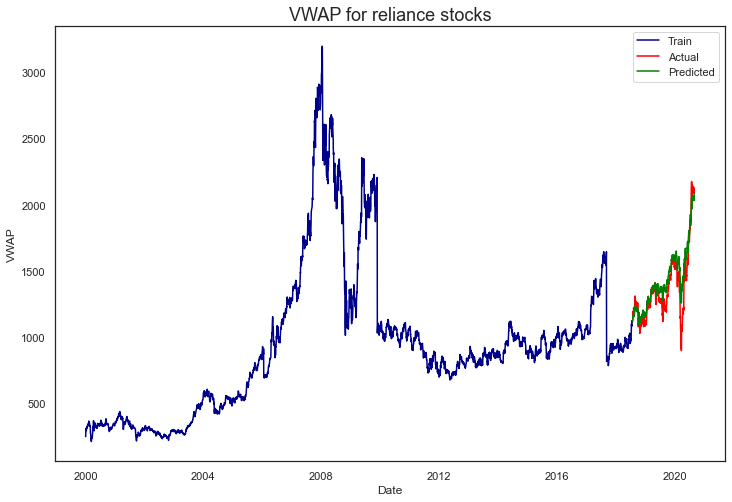

In [42]:
#plotting
plt.figure(figsize=(12,8))
plt.plot(df_train['VWAP'], label ='Train',color='darkblue')
plt.plot(df_test['VWAP'], label ='Actual',color='red')
plt.plot(sarima, label ='Predicted',color='green')
plt.title('VWAP for reliance stocks', fontsize = 18)
plt.xlabel("Date")
plt.ylabel("VWAP")
plt.legend()
plt.show()

Text(0, 0.5, 'VWAP')

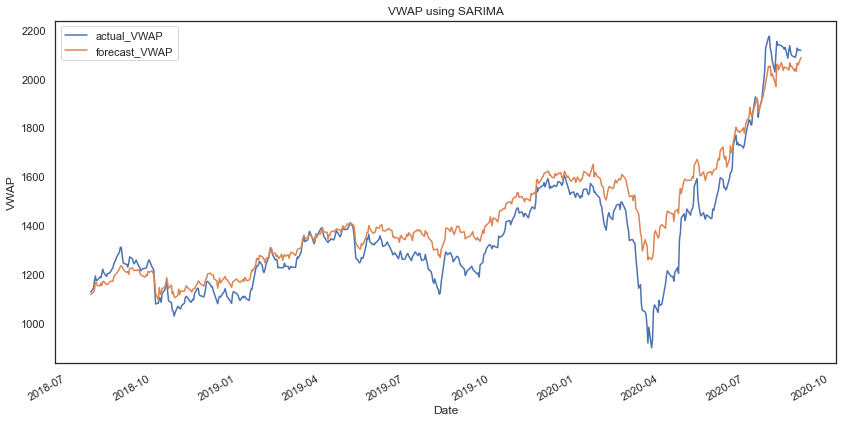

In [43]:
temp_df1[["actual_VWAP", "forecast_VWAP"]].plot(figsize=(14, 7))
plt.title('VWAP using SARIMA')
plt.ylabel('VWAP')

### Results

In [44]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
rmse = np.sqrt(mean_squared_error(temp_df1['forecast_VWAP'],temp_df1['actual_VWAP']))
mape =  mean_absolute_percentage_error(temp_df1['forecast_VWAP'],temp_df1['actual_VWAP'])
print('MAPE: %.2f'% (mape), "%")
print('RMSE: %.2f'% (rmse))

MAPE: 0.06 %
RMSE: 102.14


SARIMA model performs better than ARIMA model